In [5]:
from causalsim import *
import metrics
from sklearn.linear_model import LinearRegression
import numpy as np 
import pandas as pd

In [2]:
def run_experiment(n, p, beta, sigma, num_sim):

    n = n  # Number of individuals
    p = p     # Number of covariates
    beta = beta  # Beta_1 value for treatment effect
    sigma = sigma # Sigma value for noise term
    num_sim = num_sim
    
    metrics_lr = {'mse': [], 'bias': [], 'r2': []}
    metrics_x = {'mse': [], 'bias': [], 'r2': []}
    metrics_dr = {'mse': [], 'bias': [], 'r2': []}
    metrics_cf = {'mse': [], 'bias': [], 'r2': []}
    
    metrics_dr_invalid = {'mse': [], 'bias': [], 'r2': []}
    
    for i in range(num_sim):
        data = simulation_simple(n = n, p = p, beta = beta, sigma = sigma)
        
        tau = np.array(data['tau'])
        
        tau_hat_lr = Causal_LR(data)
        tau_hat_x = Causal_XLearner(data, LinearRegression())
        tau_hat_dr = Causal_DRLearner(data)
        tau_hat_cf = Causal_CausalForest(data)
    
        metric_lr = metrics.evaluate(tau, tau_hat_lr)
        metric_x = metrics.evaluate(tau, tau_hat_x)
        metric_dr = metrics.evaluate(tau, tau_hat_dr)
        metric_cf = metrics.evaluate(tau, tau_hat_cf)
    
        metrics_lr['mse'].append(metric_lr[0])
        metrics_lr['bias'].append(metric_lr[1])
        metrics_lr['r2'].append(metric_lr[2])
        
        metrics_x['mse'].append(metric_x[0])
        metrics_x['bias'].append(metric_x[1])
        metrics_x['r2'].append(metric_x[2])
        
       
        metrics_cf['mse'].append(metric_cf[0])
        metrics_cf['bias'].append(metric_cf[1])
        metrics_cf['r2'].append(metric_cf[2])
        
        #remove invalid from DR?
        if metric_dr[0] > -1 and metric_dr[0] < 1:
            metrics_dr['mse'].append(metric_dr[0])
            metrics_dr['bias'].append(metric_dr[1])
            metrics_dr['r2'].append(metric_dr[2])
        else:
            metrics_dr_invalid['mse'].append(metric_dr[0])
            metrics_dr_invalid['bias'].append(metric_dr[1])
            metrics_dr_invalid['r2'].append(metric_dr[2])
            
        
        #print(i)
        
    return metrics_lr, metrics_x, metrics_dr, metrics_cf, metrics_dr_invalid

In [3]:
def plot_bars(metrics_lr, metrics_x, metrics_dr, metrics_cf, exp_string):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    means = [np.mean(metrics_lr['mse']), np.mean(metrics_x['mse']), np.mean(metrics_dr['mse']), np.mean(metrics_cf['mse'])]
    errors = [np.std(metrics_lr['mse']), np.std(metrics_x['mse']), np.std(metrics_dr['mse']), np.std(metrics_cf['mse'])]
    metrics.bar_plot(axes[0],means, errors, xnames = ['LR', 'X', 'DR', 'CF'], ylabel = 'MSE', title = f'MSE {exp_string}')
    
    means = [np.mean(metrics_lr['bias']), np.mean(metrics_x['bias']), np.mean(metrics_dr['bias']), np.mean(metrics_cf['bias'])]
    errors = [np.std(metrics_lr['bias']), np.std(metrics_x['bias']), np.std(metrics_dr['bias']), np.std(metrics_cf['bias'])]
    metrics.bar_plot(axes[1],means, errors, xnames = ['LR', 'X', 'DR', 'CF'], ylabel = 'Bias', title = f'Bias {exp_string}')
    
    means = [np.mean(metrics_lr['r2']), np.mean(metrics_x['r2']), np.mean(metrics_dr['r2']), np.mean(metrics_cf['r2'])]
    errors = [np.std(metrics_lr['r2']), np.std(metrics_x['r2']), np.std(metrics_dr['r2']), np.std(metrics_cf['r2'])]
    metrics.bar_plot(axes[2],means, errors, xnames = ['LR', 'X', 'DR', 'CF'], ylabel = 'R2', title = f'R2 {exp_string}')

    plt.tight_layout()
    
    # Show the plot
    plt.show()

## Testing on N (100, 1000, 10000)

Running n = 100


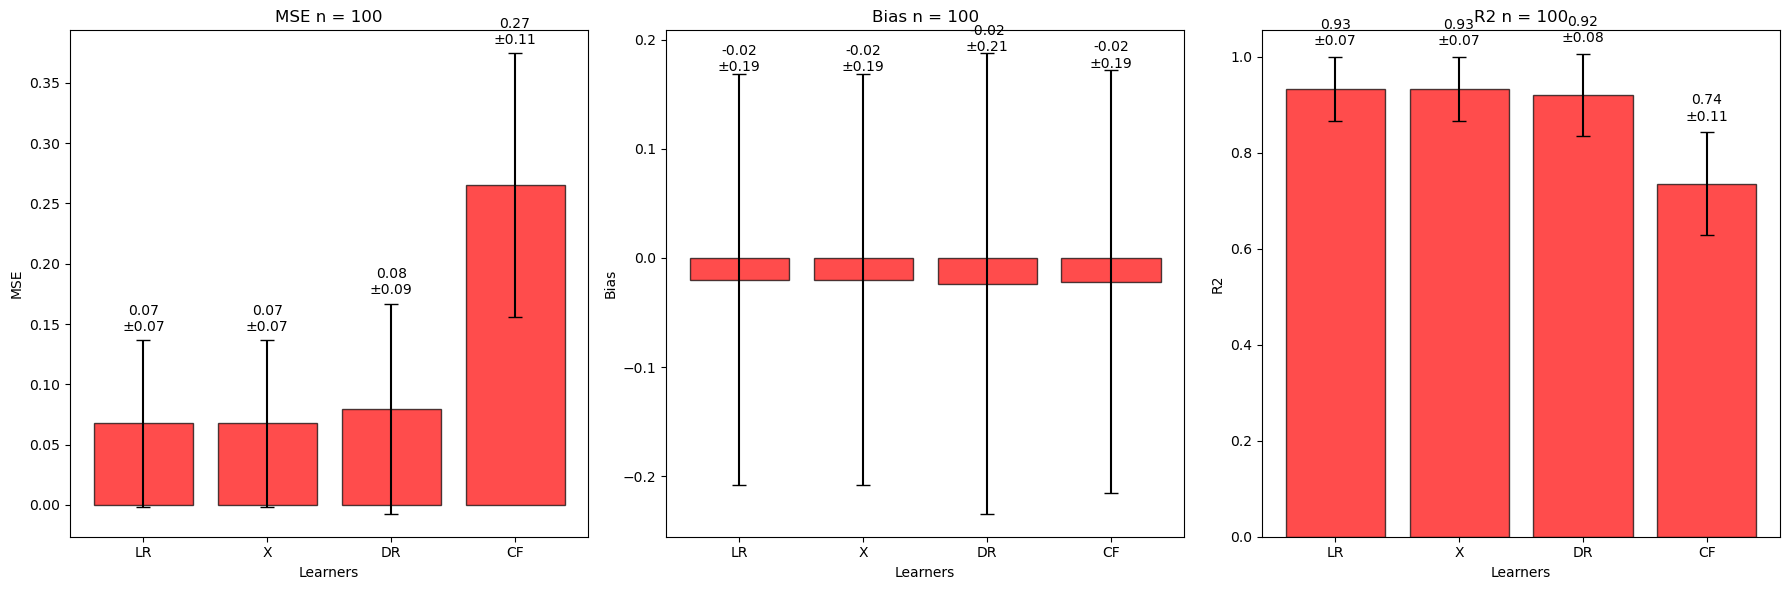

Running n = 1000


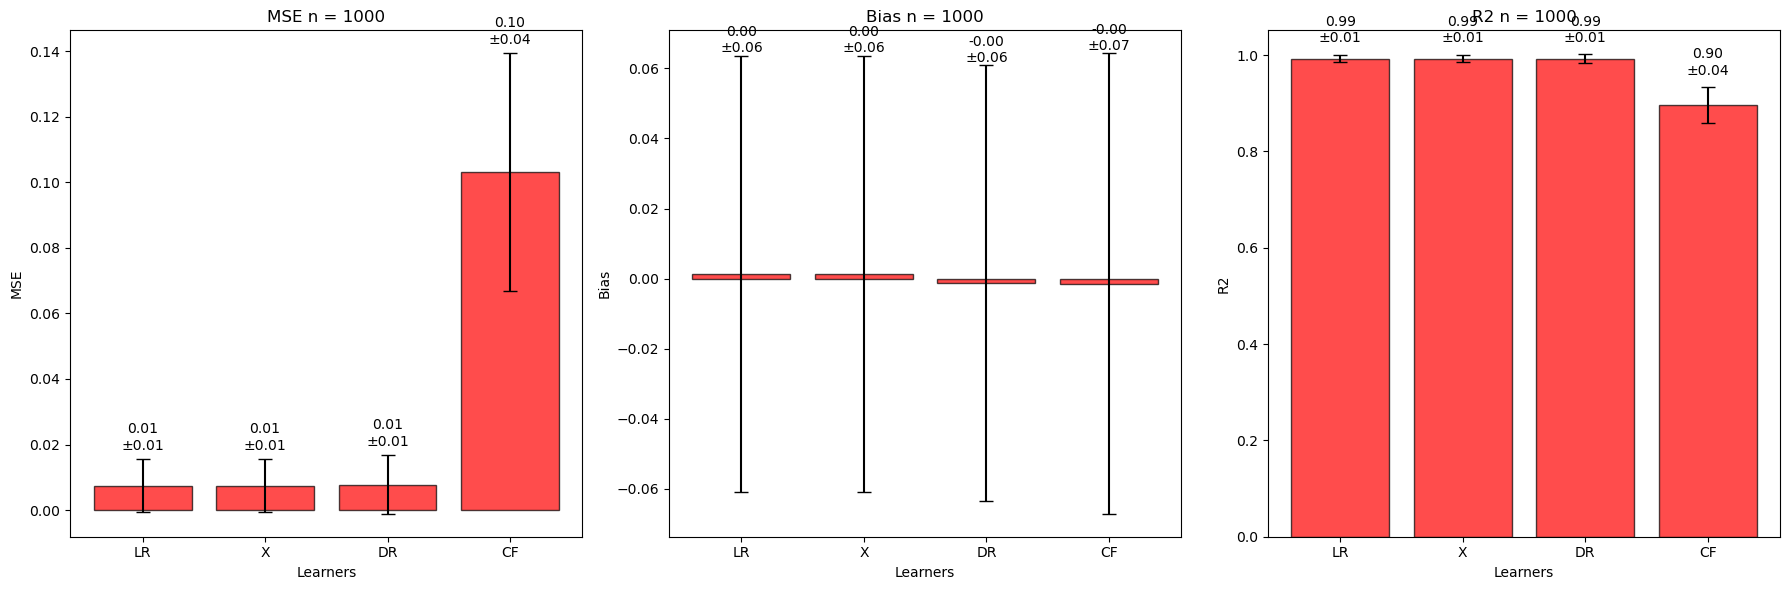

Running n = 10000


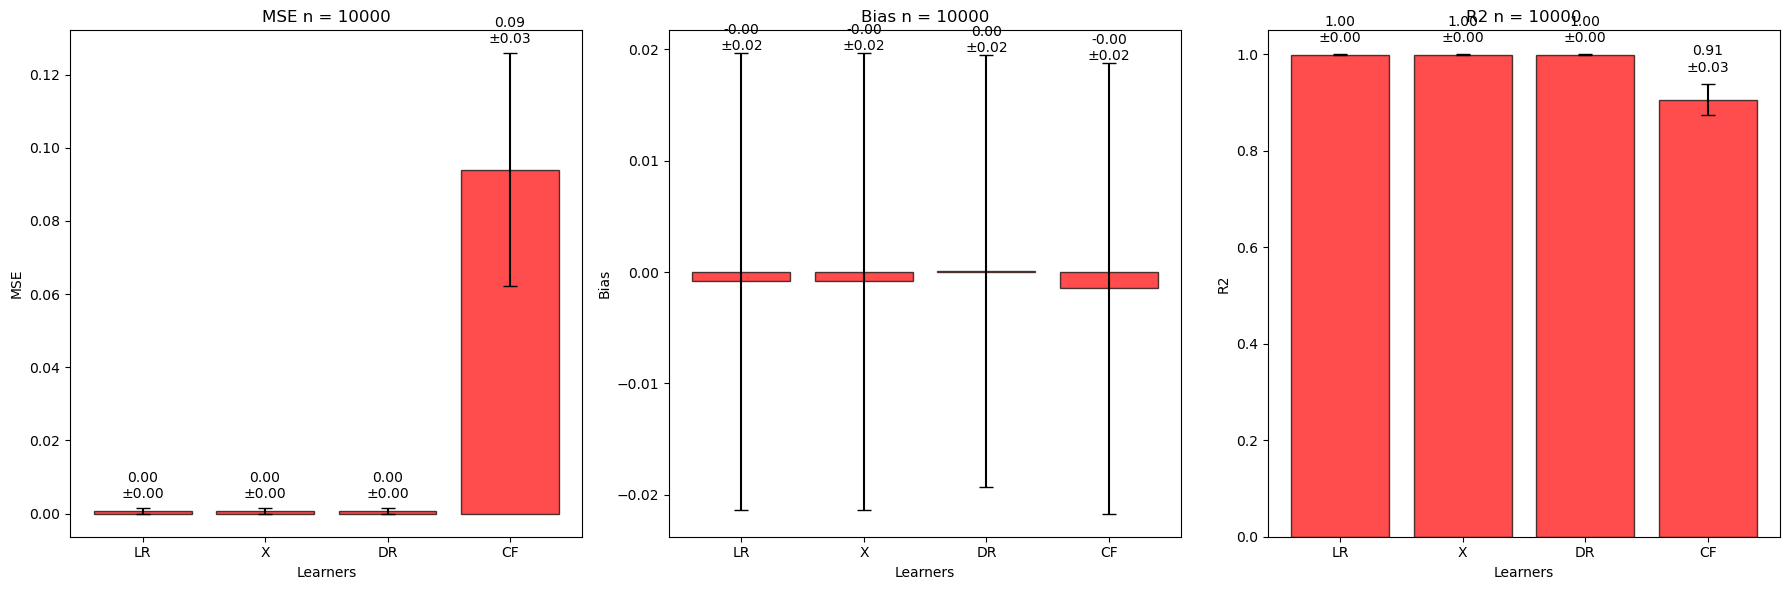

In [6]:
for n in [100,1000,10000]:
    print(f"Running n = {n}")
    n = n
    p = 1
    beta = 1
    sigma = 1
    num_sim = 100

    
    metrics_lr, metrics_x, metrics_dr, metrics_cf, metrics_df_invalid = run_experiment(n,p,beta,sigma,num_sim)
    exp_string = f"n = {n}"
    plot_bars(metrics_lr, metrics_x, metrics_dr, metrics_cf, f"n = {n}")
    

## Testing on p (1, 10, 100)

Running p = 1


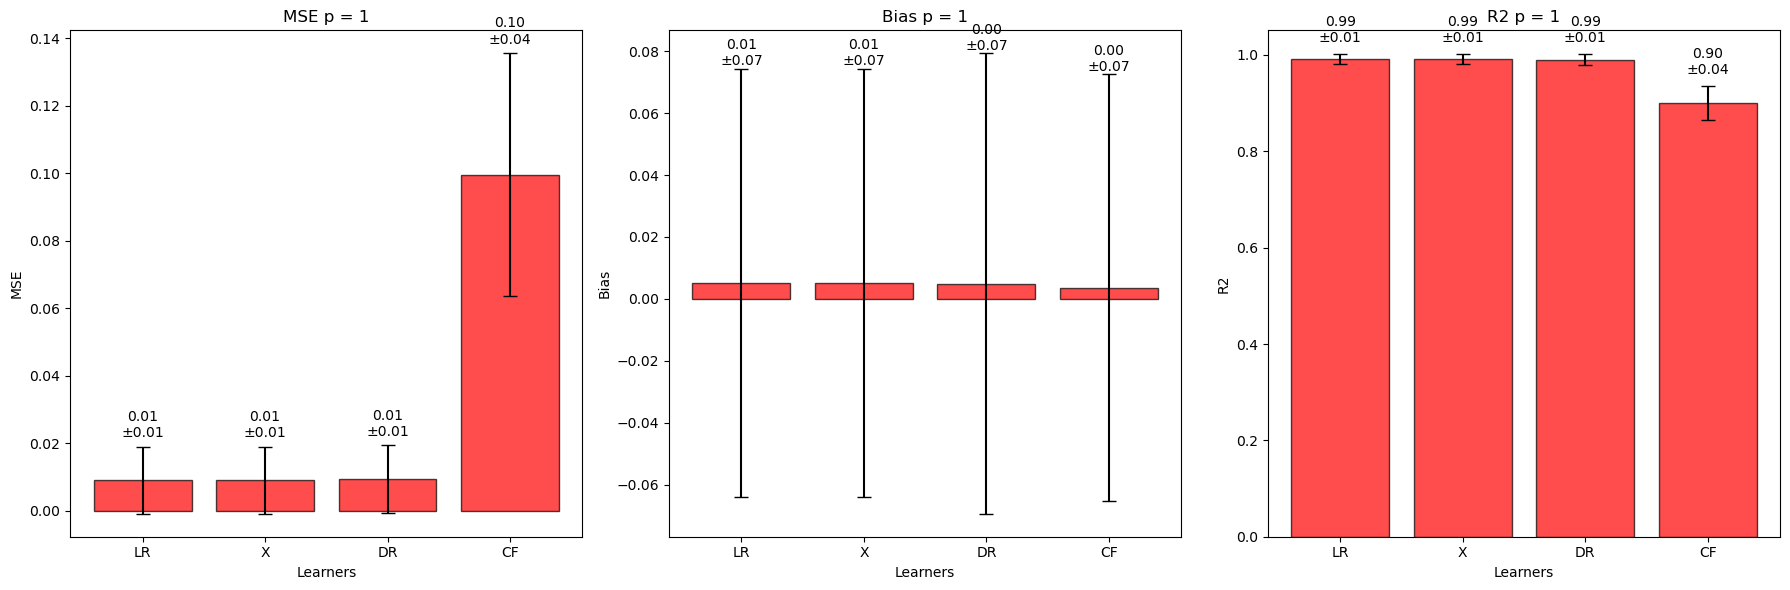

Running p = 10


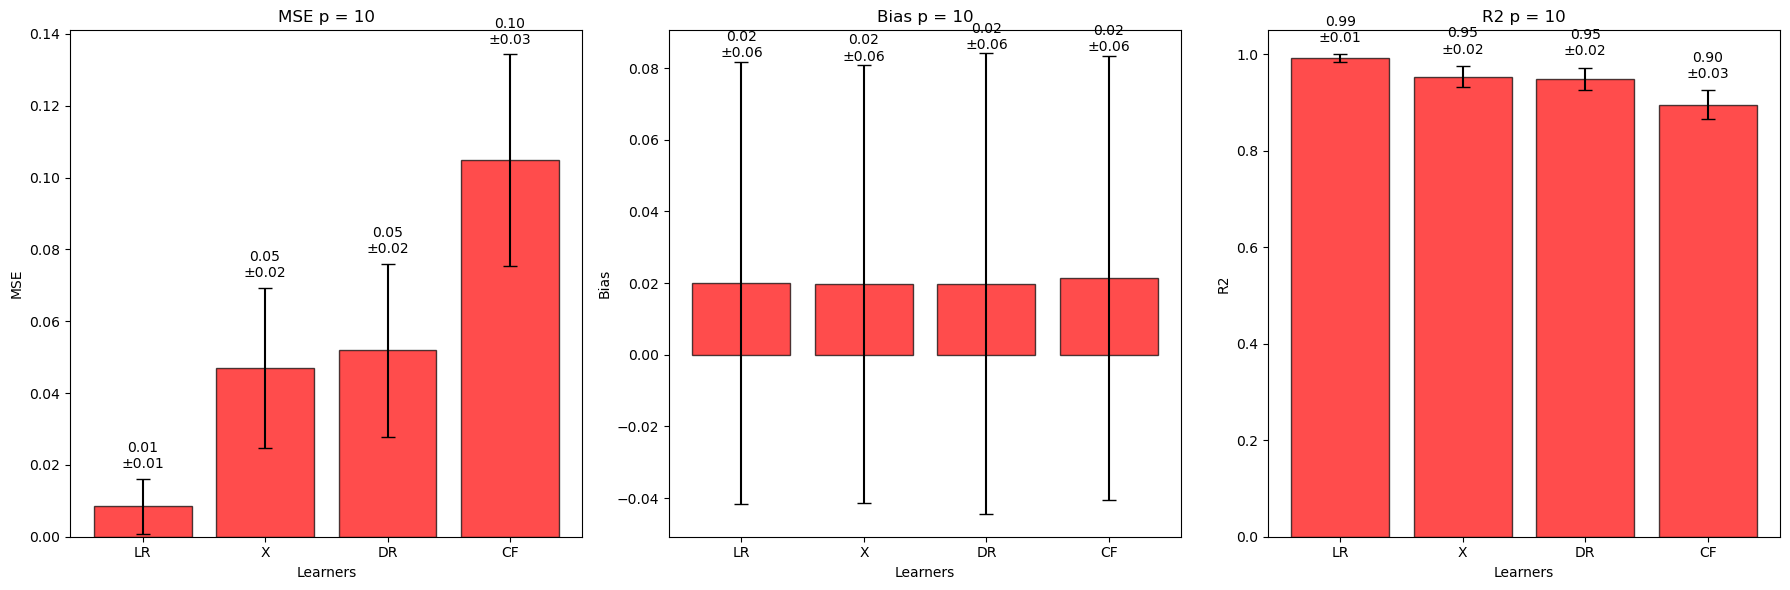

Running p = 100


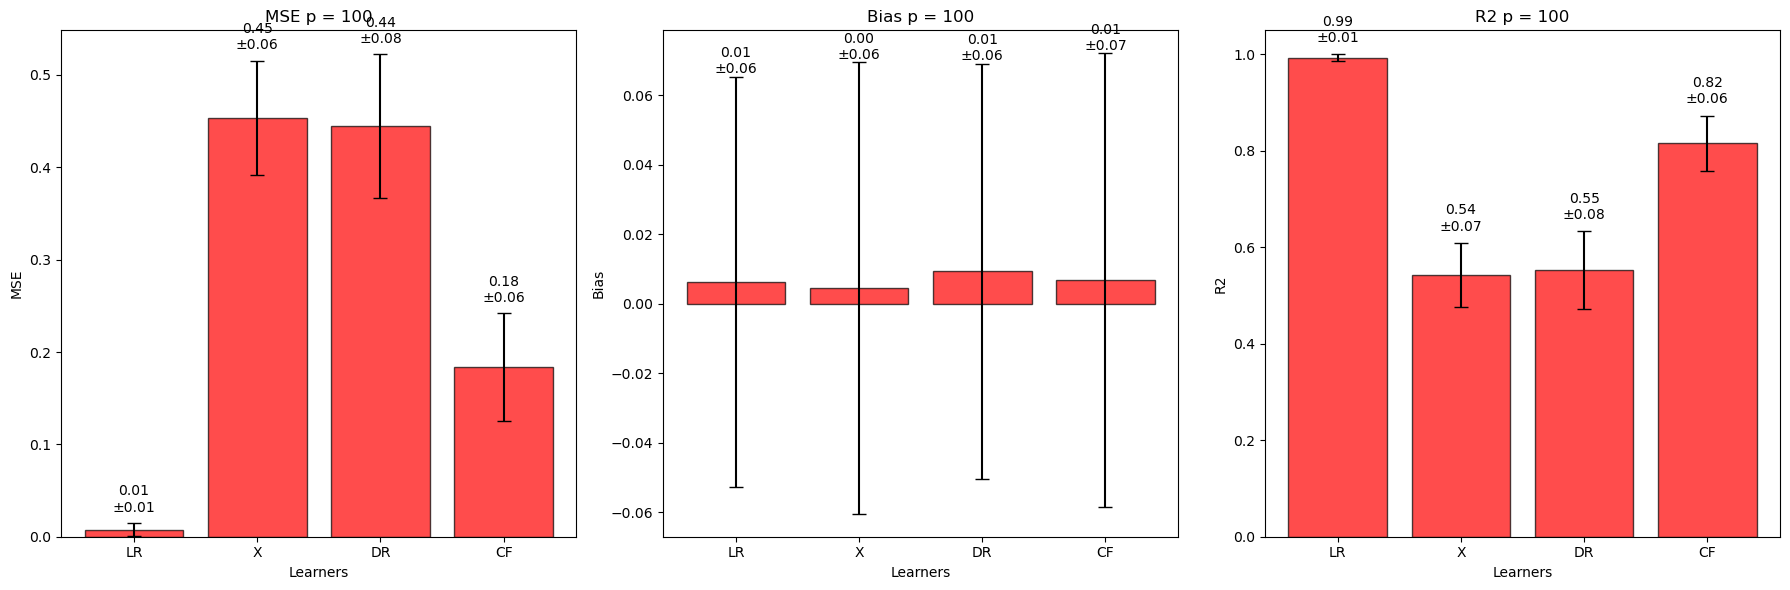

In [8]:
for p in [1,10,100]:
    print(f"Running p = {p}")
    n = 1000
    p = p
    beta = 1
    sigma = 1
    num_sim = 100

    
    metrics_lr, metrics_x, metrics_dr, metrics_cf, metrics_df_invalid = run_experiment(n,p,beta,sigma,num_sim)
    exp_string = f"n = {n}"
    plot_bars(metrics_lr, metrics_x, metrics_dr, metrics_cf, f"p = {p}")
    